In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

from collections import Counter

import seaborn as sns


from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram, set_link_color_palette
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy

from sklearn.decomposition import PCA

import activ
from activ.clustering import compute_umap_distance
from umap import UMAP

In [3]:
raw_data = activ.load_data()

In [24]:
dist = compute_umap_distance(raw_data.outcomes, 2)

In [5]:
Z = linkage(dist, method='ward')
labels = cut_tree(Z, n_clusters=[20,25,30])

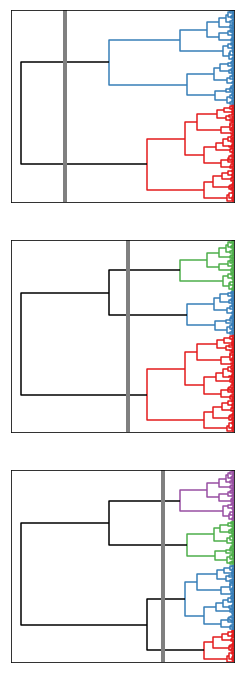

In [6]:
num_clus = (2,3,4)
plt.figure(figsize=(4,len(num_clus)*4))

set_link_color_palette(list(sns.color_palette('Set1').as_hex()))

for i, c in enumerate(num_clus):
    plt.subplot(len(num_clus),1,i+1)
    ret = dendrogram(Z, color_threshold=Z[-c+1,2], no_labels=True, orientation='left', above_threshold_color='black')
    frame1 = plt.gca()
    for xlabel_i in frame1.axes.get_xticklabels():
        xlabel_i.set_visible(False)
    for tick in frame1.axes.get_xticklines():
        tick.set_visible(False)
    plt.axvline(x=(Z[-c+1,2] + Z[-c,2])/2, color='grey', lw=4, linestyle='-')
plt.savefig('../TRACK_TBI/presentations/dendrogram_cutting.png')

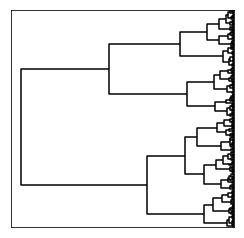

In [7]:
plt.figure(figsize=(4,4))
dendrogram(Z, color_threshold=Z[0,2], no_labels=True, orientation='left', above_threshold_color='black')
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
plt.savefig('../TRACK_TBI/presentations/dendrogram_nocut.png')

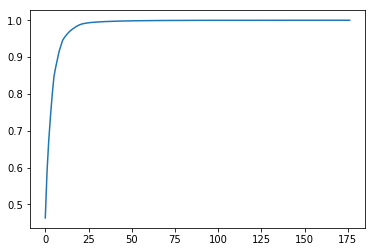

In [106]:
pca = PCA().fit(raw_data.outcomes)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [142]:
seed = 1034
#### GOOD SEEDS i.e. seeds that produce a dendrogram that is stable
####  - 1034 (w/ 15 PCA components)

#emb = UMAP(n_components=2, min_dist=0, n_neighbors=5, random_state=seed).fit_transform(raw_data.outcomes)
#emb = UMAP(n_components=2, min_dist=0, n_neighbors=5, random_state=seed, metric='precomputed').fit_transform(squareform(dist))

emb = UMAP(n_components=2, min_dist=0, n_neighbors=5, random_state=seed).fit_transform(PCA(n_components=30).fit_transform(raw_data.outcomes))

In [143]:
dist = pdist(emb)
Z = linkage(dist, method='ward')

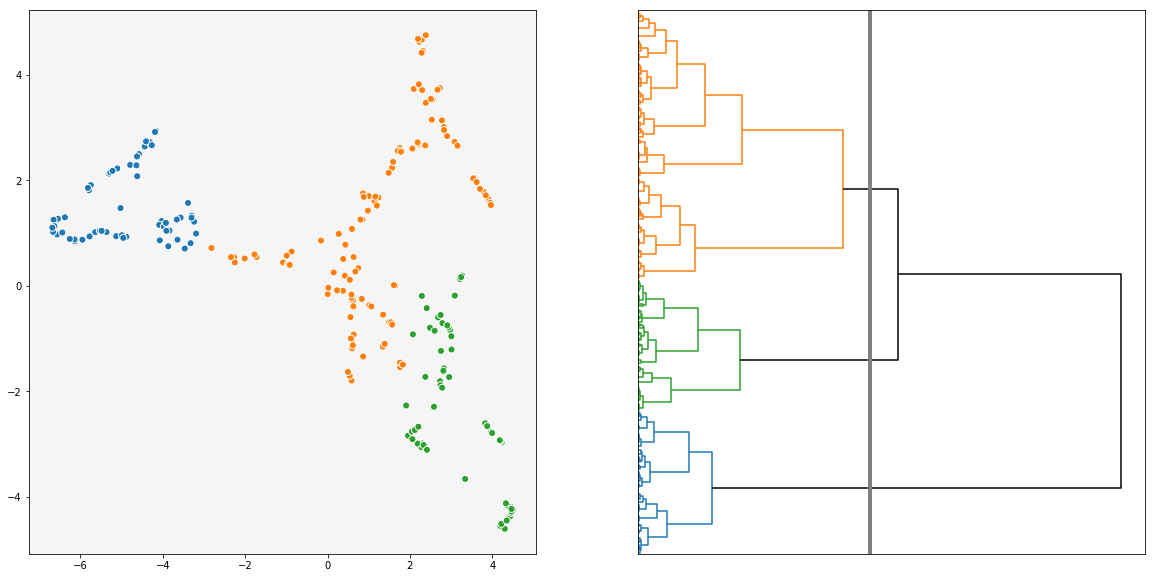

In [157]:
plt.figure(figsize=(20, 10))


import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.patches as mpatches
import matplotlib.colors as mpc


def get_labels(column, cmap='Set1'):
    uniq = np.unique(column)
    colors = sns.color_palette(cmap, len(uniq)).as_hex()
    lut = dict(zip(uniq, colors))
    labels = pd.Series([lut[v] for v in column])
    patches = [mpatches.Patch(color=c, label=l) for l, c in lut.items()]
    return labels, patches, colors


########################## EDGE COLORS

def get_link_color_func(linkmat, hex_labels):

    dflt_col = "#000000"
    link_cols = {}
    for i, i12 in enumerate(linkmat[:,:2].astype(int)):
      c1, c2 = (link_cols[x] if x > len(Z) else hex_labels[x] for x in i12)
      link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col

    return lambda x: link_cols[x]
########################## EDGE COLORS

c = 3
labels = cut_tree(Z, n_clusters=[c])

labels, patches, pal = get_labels(labels[:,0], cmap='tab10')

ax = plt.subplot(1,2,1, facecolor='whitesmoke')

ax.scatter(emb[:,0], emb[:,1], facecolors=labels, edgecolors='white', s=50)

ax = plt.subplot(1,2,2)

ret = dendrogram(Z, color_threshold=None, show_leaf_counts=True, no_labels=True, orientation='right', above_threshold_color='black',
                 link_color_func=get_link_color_func(Z, labels))
for xlabel_i in ax.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for tick in ax.axes.get_xticklines():
    tick.set_visible(False)
plt.axvline(x=(Z[-c+1,2] + Z[-c,2])/2, color='grey', lw=4, linestyle='-')
#plt.savefig('../TRACK_TBI/presentations/dendrogram_umap_%dclusters-%d.png' % (c, seed))

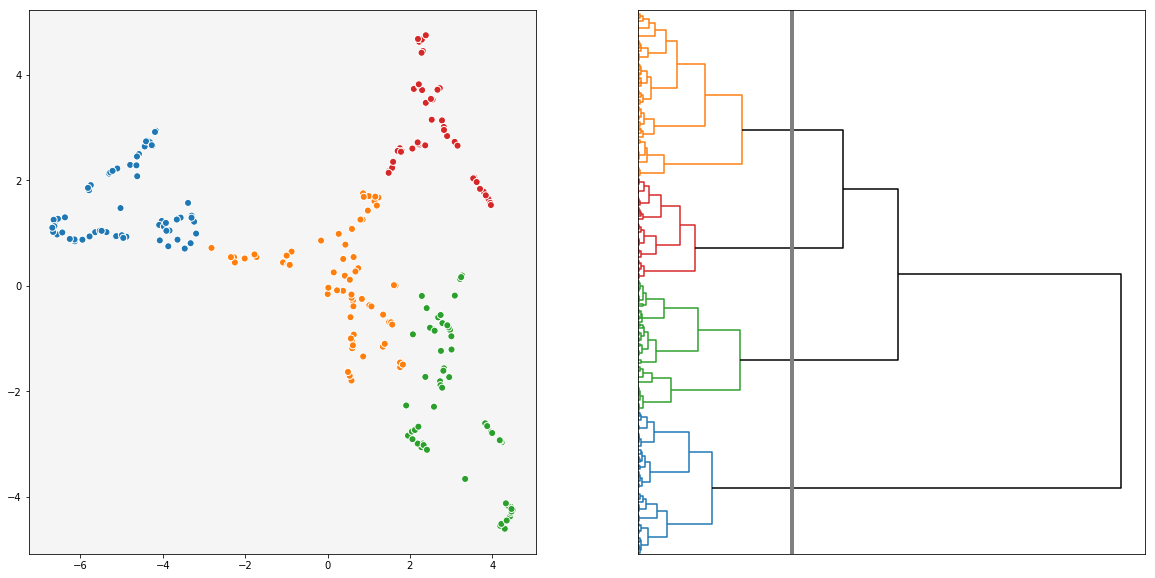

In [159]:
plt.figure(figsize=(20, 10))

c = 4
labels = cut_tree(Z, n_clusters=[c])

labels, patches, pal = get_labels(labels[:,0], cmap='tab10')

ax = plt.subplot(1,2,1, facecolor='whitesmoke')
ax.scatter(emb[:,0], emb[:,1], facecolors=labels, edgecolors='white', s=50)

ax = plt.subplot(1,2,2)


ret = dendrogram(Z, color_threshold=None, show_leaf_counts=True, no_labels=True, orientation='right', above_threshold_color='black',
                 link_color_func=get_link_color_func(Z, labels))
for xlabel_i in ax.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for tick in ax.axes.get_xticklines():
    tick.set_visible(False)
plt.axvline(x=(Z[-c+1,2] + Z[-c,2])/2, color='grey', lw=4, linestyle='-')
plt.savefig('../TRACK_TBI/presentations/dendrogram_umap_%dclusters-%d.png' % (c, seed))

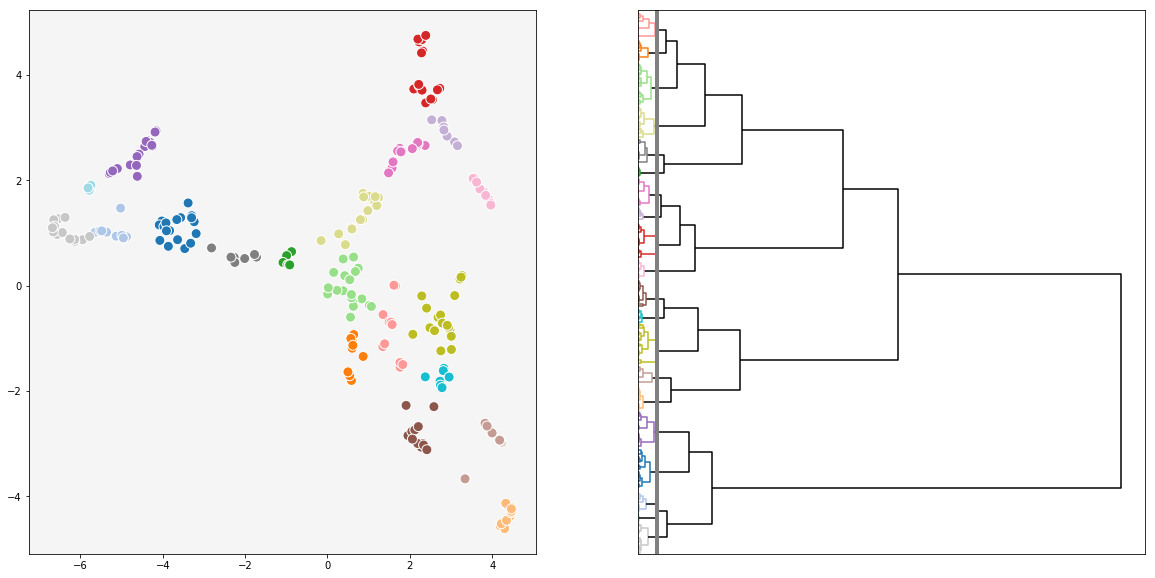

In [161]:
plt.figure(figsize=(20,10))

c = 20
labels = cut_tree(Z, n_clusters=[c])

labels, patches, pal = get_labels(labels[:,0], cmap='tab20')

ax = plt.subplot(1,2,1, facecolor='whitesmoke')
ax.scatter(emb[:,0], emb[:,1], facecolors=labels, edgecolors='white', s=100 )

ax = plt.subplot(1,2,2)


ret = dendrogram(Z, color_threshold=None, show_leaf_counts=True, no_labels=True, orientation='right', above_threshold_color='black',
                 link_color_func=get_link_color_func(Z, labels))
for xlabel_i in ax.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for tick in ax.axes.get_xticklines():
    tick.set_visible(False)
plt.axvline(x=(Z[-c+1,2] + Z[-c,2])/2, color='grey', lw=4, linestyle='-')
plt.savefig('../TRACK_TBI/presentations/dendrogram_umap_%dclusters-%d.png' % (c, seed))

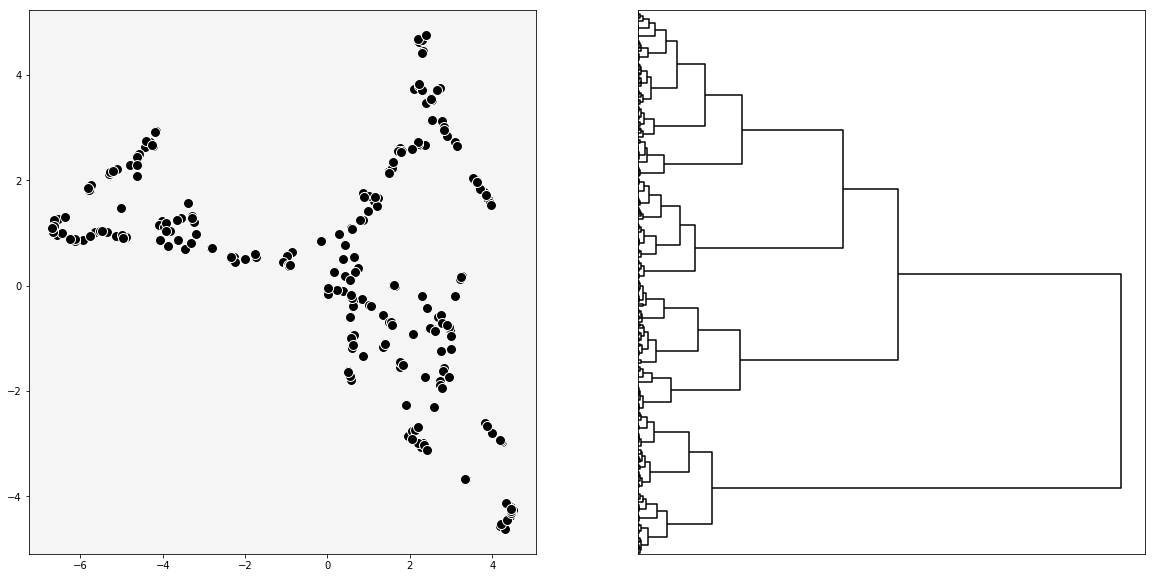

In [155]:
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1, facecolor='whitesmoke')

#sns.scatterplot(emb[:,0], emb[:, 1], legend=None, s=50, color='black')
ax.scatter(emb[:,0], emb[:,1], facecolors='black', edgecolors='white', s=100)
# ax.axes.get_yaxis().set_visible(False)
# ax.axes.get_xaxis().set_visible(False)
ax = plt.subplot(1,2,2)


ret = dendrogram(Z, color_threshold=Z[0,2], show_leaf_counts=True, no_labels=True, orientation='right', above_threshold_color='black')
for xlabel_i in ax.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for tick in ax.axes.get_xticklines():
    tick.set_visible(False)
plt.savefig('../TRACK_TBI/presentations/dendrogram_umap-%d.png' % seed)